### Step 0: Import Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Step 1: Load in the Data

In [2]:
df = pd.read_csv('data/data.csv')

### Step 2: Clean the Data

In [3]:
# See first ten rows
df.head(10)

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2021-05-03,SQu7iVRCTD,ACSgVaipTW,9uorM8k0ee,Dumbbell Squeeze Press,6,6.803894,fake_id_429
1,2021-10-06,WtiL03huRb,xPS7RzoOGm,CrgGcfBH5i,Bent Over Barbell Row,15,61.235043,fake_id_443
2,2021-08-03,OXXdax4EA0,N6zu9IJNBz,NWDLVI2aHz,Leg Raise,8,0.000000,fake_id_451
3,2021-10-23,VNwsWLSr53,UQBXLgsfXN,JNKWgxAhgD,Dumbbell Shrug,10,18.143716,fake_id_439
4,2021-08-16,eGDxXCt3nA,EAjKaB5zWy,IlB9juhi9x,Dumbbell Kickbacks,19,2.267965,fake_id_420
5,2021-08-06,FRzI2Lqr5g,otjt26R0oL,wq0Gzt1iyh,Barbell Shoulder Press,10,27.215575,fake_id_439
6,2021-03-18,iKfmfln3F4,s5tzCNPRXw,ADrTWFCG8N,Lunge Jump,9,0.000000,fake_id_443
7,2021-08-18,lq2uNBCEm4,Gx6Z2fevPD,nBUqtKby0f,Incline Dumbbell Row,12,9.071858,fake_id_437
8,2021-03-30,LO7kBZAjaE,243X43p1XP,RsWpL7b1Ss,Seated Leg Curl,10,38.555397,fake_id_447
9,2021-03-30,ceor1JHPBE,erjFOF21dc,flspgpTbWQ,Reverse Barbell Curl,12,14.514973,fake_id_436


In [4]:
# See data type of first row of date data
type(df['Date'][0])

str

In [5]:
# Convert all string dates to Pandas datetime
df['Date'] = df['Date'].apply(lambda date: pd.to_datetime(date))

In [6]:
# Ensure that all dates are not null
first_date = min(df['Date'])
last_date = max(df['Date'])

print('first date: {}'.format(first_date))
print('last date: {}'.format(last_date))

first date: 2021-01-01 00:00:00
last date: 2021-12-16 00:00:00


In [7]:
# Let's also sort the dataframe so that entries are chronological
df = df.sort_values(by='Date')

In [8]:
# See number of null values for workoutId
print('number of nulls for workoutId: {}'.format(df['workoutId'].isnull().sum()))

number of nulls for workoutId: 0


In [9]:
# See if there is another way that missing values are encoded in the dataset for workoutId
df.groupby('workoutId').agg('count')['Date'].sort_values()[::-1]

workoutId
Qtwnw1THH7    40
BFOmFxaNJf    40
PiQu9Xo8Tn    38
nXFHObr7YB    36
ocnCnE31m0    35
              ..
9o60ohMsOx     1
utru2DoD84     1
GLSGl3DyQE     1
YHH1rr2ht9     1
Gful6wHWEi     1
Name: Date, Length: 3514, dtype: int64

In [10]:
# Because there isn't a key like 'missing' or '?' that encodes at least 35 values for workoutId, it appears like there is 
# not much of an issue with missing data for workoutId

# Because exerciseId and exerciseName encode the exact same information, let's drop exerciseId
df.drop(columns=['exerciseId'], inplace=True)

In [11]:
# We can now move our analysis to exerciseName. Let's begin by looking at the unique values for this feature.
sorted(df['exerciseName'].unique())

['Abs Bike',
 'Air Squats',
 'Australian Chin Up',
 'Back Squat',
 'Barbell Glute Bridge',
 'Barbell Hip Thrust',
 'Barbell Incline Bench Press',
 'Barbell Shoulder Press',
 'Bent Over Barbell Row',
 'Cable Crunch',
 'Cable Double Bicep Curl',
 'Cable Hip Abduction',
 'Cable Shoulder Internal Rotation',
 'Cable Upright Row',
 'Calf Raise',
 'Clean',
 'Clean Deadlift',
 'Clean and Jerk',
 'Dead Bug',
 'Decline Leg Raise',
 'Decline Push Up',
 'Dumbbell Clean',
 'Dumbbell Decline Bench Press',
 'Dumbbell Kickbacks',
 'Dumbbell Pullover',
 'Dumbbell Rear Delt Raise',
 'Dumbbell Shoulder Raise',
 'Dumbbell Shrug',
 'Dumbbell Squeeze Press',
 'Dumbbell Step Up',
 'Dumbbell Sumo Squat',
 'Exercise Ball Crunch',
 'Exercise Ball Push Up',
 'Floor Press',
 'Forward Stability Ball Plank',
 'Frog Pump',
 'Glute Ham Raise Situp',
 'Hammerstrength Shrug',
 'Handle Band Pec Fly',
 'Handle Band Squat to Press',
 'Hang Clean',
 'Hang Snatch',
 'Hanging Leg Raise',
 'Incline Dumbbell Row',
 'Incline Sv

In [12]:
# Amazingly, it does not look like there is any missing data. Moreover, all names are standardized (i.e., we don't have
#'squat', 'Squat', and 'Back Squat') and spelled correctly.

# Our next question to answer is to look at whether there is any missing data for reps. Let's begin by looking at the
# data type of the first row.
print(type(df['reps'][0]))

<class 'numpy.int64'>


In [13]:
# Iterate over all values to see if they all have the same data type
for idx in range(len(df)):
    if type(df['reps'][idx]) != np.int64:
        print(df['reps'][idx])

In [14]:
# From above we can see that all values have the same type. Now let's make sure that all values are reasonable.
sorted(df['reps'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 47,
 48,
 49,
 50,
 60,
 100]

In [15]:
# It doesn't make sense to have a row with zero reps unless the exercise is something like a plank (even there though,
# a single rep is still being performed). With that in mind, let's look at the rows where reps is equal to 0 and see the
# exercise type
dict(df[df['reps'] == 0].groupby('exerciseName').agg('count')['fake_user_id'])

{'Forward Stability Ball Plank': 25, 'Plank': 673, 'Sled Pull': 6}

In [16]:
# Since the exercises with 0 reps are all of the same type, it doesn't seem like there was a data entry error. Accordingly,
# rows with zero reps will not be removed from the dataframe.

In [17]:
# Now let's look at weight.
print(type(df['weight'][0]))

<class 'numpy.float64'>


In [18]:
# Iterate over all values to see if they all have the same data type
for idx in range(len(df)):
    if type(df['weight'][idx]) != np.float64:
        print(df['weight'][idx])

In [19]:
# Check for nulls
print('number of nulls for weight: {}'.format(df['weight'].isnull().sum()))

number of nulls for weight: 0


In [20]:
# Make sure all values are reasonable
print('max weight: {}'.format(max(df['weight'])))
print('min weight: {}'.format(min(df['weight'])))

max weight: 172.3653055855431
min weight: 0.0


In [21]:
# Weight also looks good. As a side note, it looks like the values for this column are probably in kilograms.

# Does every row have a user id?
for idx in range(len(df)):
    if df['fake_user_id'][idx][:8] != 'fake_id_':
        print(df['fake_user_id'][idx])

In [22]:
# From above it seems like every row has a user.

### Step 3: Create New Features (where relevant)

In [23]:
# Create feature for join date (i.e., date of first workout)
join_dict = {}

for user in df['fake_user_id'].unique():
    temp_df = df[df['fake_user_id'] == user]
    temp_df.reset_index(drop=True, inplace=True)
    join_date = temp_df['Date'][0]
    join_dict[user] = join_date
    
df['firstWorkoutDate'] = df['fake_user_id'].apply(lambda user: join_dict[user])

In [25]:
# Create feature for last workout date
end_dict = {}

for user in df['fake_user_id'].unique():
    temp_df = df[df['fake_user_id'] == user]
    temp_df.reset_index(drop=True, inplace=True)
    end_date = list(temp_df['Date'])[-1]
    end_dict[user] = end_date
    
df['lastWorkoutDate'] = df['fake_user_id'].apply(lambda user: end_dict[user])

In [30]:
# Create feature for time on app
df['daysOnApp'] = df['lastWorkoutDate'] - df['firstWorkoutDate']
df['daysOnApp'] = df['daysOnApp'].apply(lambda x: x.days)

In [32]:
# Create feature for whether workout occurred on the weekend.
df['dayOfWeek'] = df['Date'].apply(lambda date: date.dayofweek)   # dayofweek 0 if Monday, ..., 6 if Sunday

In [33]:
# It might be useful to be able to easily see a given user's workout history. Accordingly, let's generate features
# for the number of times the user worked out and workout number
workout_dict = {}

for user in df['fake_user_id'].unique():
    workout_dict[user] = {}
    temp_df = df[df['fake_user_id'] == user]
    workout_number = 1
    for workout in temp_df['workoutId'].unique():
        workout_dict[user][workout] = workout_number
        workout_number += 1
        
total_workouts_dict = {}

for user in workout_dict.keys():
    total_workouts_dict[user] = max(workout_dict[user].values())
    
df['totalWorkouts'] = df['fake_user_id'].apply(lambda user: total_workouts_dict[user])
df['workoutNumber'] = 0

for idx in range(len(df)):
    user = df['fake_user_id'][idx]
    workout = df['workoutId'][idx]
    df['workoutNumber'][idx] = workout_dict[user][workout]

del workout_dict, total_workouts_dict

<ipython-input-33-9604723fbbe4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workoutNumber'][idx] = workout_dict[user][workout]


In [34]:
# Ensure that created features look good
df.head(10)

,Date,workoutId,singleSetId,exerciseName,reps,weight,fake_user_id,firstWorkoutDate,lastWorkoutDate,daysOnApp,dayOfWeek,totalWorkouts,workoutNumber
9286,2021-01-01,EBJzXMZWDw,13F3lTHO1C,Leg Raise,6,0.000000,fake_id_451,2021-01-01,2021-12-15,348,4,77,1
24482,2021-01-01,vCmiDAIOT1,vulqw5hsZm,Tricep Push Up,11,0.000000,fake_id_424,2021-01-01,2021-12-16,349,4,79,1
14498,2021-01-01,3MkG1RkBPR,iftWtoRQFE,Dumbbell Sumo Squat,15,9.071858,fake_id_459,2021-01-01,2021-12-15,348,4,96,1
17904,2021-01-01,5J5zE2nLYd,bY3AEmfQiu,Step Up,8,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1
20704,2021-01-01,5J5zE2nLYd,3BbqFJlYBt,Step Up,8,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1
6577,2021-01-01,DDJYkTlTpE,MUKBDvX6sD,Dumbbell Kickbacks,8,3.628743,fake_id_440,2021-01-01,2021-05-31,150,4,61,1
6214,2021-01-01,5J5zE2nLYd,HaLyx07HCK,Frog Pump,16,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1
1413,2021-01-01,EBJzXMZWDw,O5L7IskBPY,Leg Raise,6,0.000000,fake_id_451,2021-01-01,2021-12-15,348,4,77,1
15686,2021-01-01,DDJYkTlTpE,dqsC7qyaky,Plank,0,0.000000,fake_id_440,2021-01-01,2021-05-31,150,4,61,1
23262,2021-01-01,qsgydUbd8N,99m5KB7qjC,Seated Leg Curl,12,40.823362,fake_id_457,2021-01-01,2021-12-13,346,4,87,1


In [35]:
# Now let's generate features corresponding to sets in the given workout and the set number for a given exercise
set_dict = {}

for workout in df['workoutId'].unique():
    set_dict[workout] = {}
    temp_df = df[df['workoutId'] == workout]
    set_number = 1
    for workout_set in temp_df['singleSetId']:
        set_dict[workout][workout_set] = set_number
        set_number += 1
        
sets_in_workout_dict = {}

for workout in set_dict.keys():
    sets_in_workout_dict[workout] = max(set_dict[workout].values())
    
df['totalSetsInWorkout'] = df['workoutId'].apply(lambda workout: sets_in_workout_dict[workout])
df['setNumber'] = 0

for idx in range(len(df)):
    workout = df['workoutId'][idx]
    workout_set = df['singleSetId'][idx]
    df['setNumber'][idx] = set_dict[workout][workout_set]

del set_dict, sets_in_workout_dict

<ipython-input-35-5f28fb83fb44>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['setNumber'][idx] = set_dict[workout][workout_set]


In [36]:
# Ensure that created features look good
df.head(10)

,Date,workoutId,singleSetId,exerciseName,reps,weight,fake_user_id,firstWorkoutDate,lastWorkoutDate,daysOnApp,dayOfWeek,totalWorkouts,workoutNumber,totalSetsInWorkout,setNumber
9286,2021-01-01,EBJzXMZWDw,13F3lTHO1C,Leg Raise,6,0.000000,fake_id_451,2021-01-01,2021-12-15,348,4,77,1,4,1
24482,2021-01-01,vCmiDAIOT1,vulqw5hsZm,Tricep Push Up,11,0.000000,fake_id_424,2021-01-01,2021-12-16,349,4,79,1,4,1
14498,2021-01-01,3MkG1RkBPR,iftWtoRQFE,Dumbbell Sumo Squat,15,9.071858,fake_id_459,2021-01-01,2021-12-15,348,4,96,1,3,1
17904,2021-01-01,5J5zE2nLYd,bY3AEmfQiu,Step Up,8,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1,9,1
20704,2021-01-01,5J5zE2nLYd,3BbqFJlYBt,Step Up,8,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1,9,2
6577,2021-01-01,DDJYkTlTpE,MUKBDvX6sD,Dumbbell Kickbacks,8,3.628743,fake_id_440,2021-01-01,2021-05-31,150,4,61,1,5,1
6214,2021-01-01,5J5zE2nLYd,HaLyx07HCK,Frog Pump,16,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1,9,3
1413,2021-01-01,EBJzXMZWDw,O5L7IskBPY,Leg Raise,6,0.000000,fake_id_451,2021-01-01,2021-12-15,348,4,77,1,4,2
15686,2021-01-01,DDJYkTlTpE,dqsC7qyaky,Plank,0,0.000000,fake_id_440,2021-01-01,2021-05-31,150,4,61,1,5,2
23262,2021-01-01,qsgydUbd8N,99m5KB7qjC,Seated Leg Curl,12,40.823362,fake_id_457,2021-01-01,2021-12-13,346,4,87,1,4,1


In [37]:
# Now generate feature for number of sets of each exercise per workout and number of sets of given exercise completed
# in aggregate
workout_exercise_dict = {}

for workout in df['workoutId'].unique():
    temp_df = df[df['workoutId'] == workout]
    workout_exercise_dict[workout] = {}
    exercise_counts = dict(temp_df.groupby('exerciseName').agg('count')['Date'])
    for key in exercise_counts.keys():
        workout_exercise_dict[workout][key] = exercise_counts[key]
        
total_exercise_dict = {}

for user in df['fake_user_id'].unique():
    temp_df = df[df['fake_user_id'] == user]
    exercise_counts = dict(temp_df.groupby('exerciseName').agg('count')['Date'])
    total_exercise_dict[user] = {}
    for key in exercise_counts.keys():
        total_exercise_dict[user][key] = exercise_counts[key]
        
df['setsOfExerciseWorkout'] = 0
df['setsOfExerciseTotal'] = 0
df['totalSets'] = df['fake_user_id'].apply(lambda user: sum(total_exercise_dict[user].values()))

for idx in range(len(df)):
    workout = df['workoutId'][idx]
    exercise = df['exerciseName'][idx]
    user = df['fake_user_id'][idx]
    df['setsOfExerciseWorkout'][idx] = workout_exercise_dict[workout][exercise]
    df['setsOfExerciseTotal'][idx] = total_exercise_dict[user][exercise]
    
del workout_exercise_dict, total_exercise_dict

<ipython-input-37-f4c240829c28>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['setsOfExerciseWorkout'][idx] = workout_exercise_dict[workout][exercise]
<ipython-input-37-f4c240829c28>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['setsOfExerciseTotal'][idx] = total_exercise_dict[user][exercise]


In [38]:
# Ensure that created features look good
df.head(10)

,Date,workoutId,singleSetId,exerciseName,reps,weight,fake_user_id,firstWorkoutDate,lastWorkoutDate,daysOnApp,dayOfWeek,totalWorkouts,workoutNumber,totalSetsInWorkout,setNumber,setsOfExerciseWorkout,setsOfExerciseTotal,totalSets
9286,2021-01-01,EBJzXMZWDw,13F3lTHO1C,Leg Raise,6,0.000000,fake_id_451,2021-01-01,2021-12-15,348,4,77,1,4,1,4,55,378
24482,2021-01-01,vCmiDAIOT1,vulqw5hsZm,Tricep Push Up,11,0.000000,fake_id_424,2021-01-01,2021-12-16,349,4,79,1,4,1,4,17,471
14498,2021-01-01,3MkG1RkBPR,iftWtoRQFE,Dumbbell Sumo Squat,15,9.071858,fake_id_459,2021-01-01,2021-12-15,348,4,96,1,3,1,3,18,512
17904,2021-01-01,5J5zE2nLYd,bY3AEmfQiu,Step Up,8,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1,9,1,4,4,55
20704,2021-01-01,5J5zE2nLYd,3BbqFJlYBt,Step Up,8,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1,9,2,4,4,55
6577,2021-01-01,DDJYkTlTpE,MUKBDvX6sD,Dumbbell Kickbacks,8,3.628743,fake_id_440,2021-01-01,2021-05-31,150,4,61,1,5,1,3,40,447
6214,2021-01-01,5J5zE2nLYd,HaLyx07HCK,Frog Pump,16,0.000000,fake_id_467,2021-01-01,2021-05-07,126,4,7,1,9,3,5,5,55
1413,2021-01-01,EBJzXMZWDw,O5L7IskBPY,Leg Raise,6,0.000000,fake_id_451,2021-01-01,2021-12-15,348,4,77,1,4,2,4,55,378
15686,2021-01-01,DDJYkTlTpE,dqsC7qyaky,Plank,0,0.000000,fake_id_440,2021-01-01,2021-05-31,150,4,61,1,5,2,2,18,447
23262,2021-01-01,qsgydUbd8N,99m5KB7qjC,Seated Leg Curl,12,40.823362,fake_id_457,2021-01-01,2021-12-13,346,4,87,1,4,1,4,126,656


In [39]:
# Now that we are done with 'singleSetId' let's drop it
df.drop(columns=['singleSetId'], inplace=True)

In [40]:
# Furthermore, let's reset our index
df.reset_index(drop=True, inplace=True)

In [41]:
# Create a new feature for time since last workout
workout_date_dict = {}

for idx in range(len(df)):
    workout = df['workoutId'][idx]
    date = df['Date'][idx]
    user = df['fake_user_id'][idx]
    workout_num = df['workoutNumber'][idx]
    if user not in workout_date_dict:
        workout_date_dict[user] = {}
    if workout_num not in workout_date_dict[user]:
        workout_date_dict[user][workout_num] = date

days_since_last_dict = {}

for user, date_dict in workout_date_dict.items():
    days_since_last_dict[user] = {}
    for workout_num in date_dict.keys():
        if workout_num == 1:
            days_since_last_dict[user][workout_num] = np.nan
        else:
            days_since_last_dict[user][workout_num] = np.abs((workout_date_dict[user][workout_num]-workout_date_dict[user][workout_num-1]).days)
        
df['daysSinceLastWorkout'] = 0        

for idx in range(len(df)):
    user = df['fake_user_id'][idx]
    workout_num = df['workoutNumber'][idx]
    df['daysSinceLastWorkout'][idx] = days_since_last_dict[user][workout_num]

del workout_date_dict, days_since_last_dict

<ipython-input-41-a4ea3b9e0c8a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daysSinceLastWorkout'][idx] = days_since_last_dict[user][workout_num]
C:\Users\mramsey002\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [42]:
# Ensure that created features look good
df.tail(10)

,Date,workoutId,exerciseName,reps,weight,fake_user_id,firstWorkoutDate,lastWorkoutDate,daysOnApp,dayOfWeek,totalWorkouts,workoutNumber,totalSetsInWorkout,setNumber,setsOfExerciseWorkout,setsOfExerciseTotal,totalSets,daysSinceLastWorkout
25341,2021-12-16,2HD893ASAD,Barbell Incline Bench Press,8,24.947610,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,3,3,26,471,8.0
25342,2021-12-16,6n4jFputZp,Seated Leg Curl,10,63.503007,fake_id_449,2021-01-04,2021-12-16,346,3,85,85,6,4,4,19,435,2.0
25343,2021-12-16,6n4jFputZp,Seated Leg Curl,10,63.503007,fake_id_449,2021-01-04,2021-12-16,346,3,85,85,6,5,4,19,435,2.0
25344,2021-12-16,2HD893ASAD,Exercise Ball Crunch,20,0.000000,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,4,3,19,471,8.0
25345,2021-12-16,6n4jFputZp,Single Leg Hip Thrust,8,0.000000,fake_id_449,2021-01-04,2021-12-16,346,3,85,85,6,6,2,10,435,2.0
25346,2021-12-16,2HD893ASAD,Shotgun Row,8,10.205840,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,5,3,9,471,8.0
25347,2021-12-16,2HD893ASAD,Shotgun Row,8,10.205840,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,6,3,9,471,8.0
25348,2021-12-16,2HD893ASAD,Shotgun Row,8,10.205840,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,7,3,9,471,8.0
25349,2021-12-16,2HD893ASAD,Exercise Ball Crunch,20,0.000000,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,8,3,19,471,8.0
25350,2021-12-16,2HD893ASAD,Exercise Ball Crunch,20,0.000000,fake_id_424,2021-01-01,2021-12-16,349,3,79,79,9,9,3,19,471,8.0


In [43]:
# We could do more analysis, but for now I will stop with creating features.

### Step 4: Explore the Data

#### User

Q1: How many workouts did users do in 2021? 

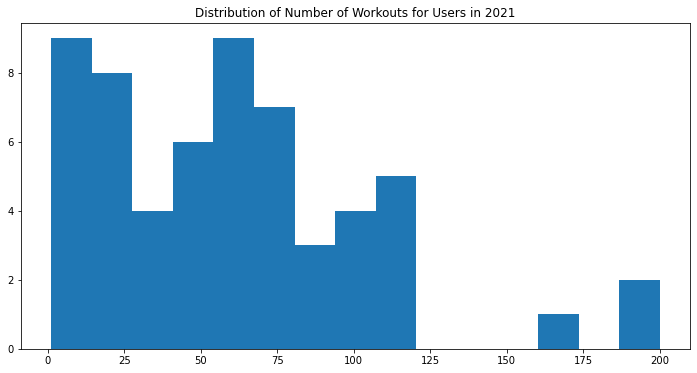

In [88]:
number_of_workouts_dict = {}

for idx in range(len(df)):
    user = df['fake_user_id'][idx]
    number = df['totalWorkouts'][idx]
    if user not in number_of_workouts_dict:
        number_of_workouts_dict[user] = number

counts = list(number_of_workouts_dict.values())

plt.figure(figsize=(12,6))
plt.title('Distribution of Number of Workouts for Users in 2021')
plt.hist(counts, bins=15)
plt.show()

In [90]:
print('median number of workouts: {}'.format(np.round(np.median(counts), 2)))
print('mean number of workouts: {}'.format(np.round(np.mean(counts), 2)))

median number of workouts: 58.0
mean number of workouts: 60.59


In [94]:
counter_every_other = 0
counter_every_third = 0

for key in number_of_workouts_dict.keys():
    if number_of_workouts_dict[key] > 180:
        counter_every_other += 1
    if number_of_workouts_dict[key] > 120:
        counter_every_third += 1
        
print('proportion of users who worked out at least every other day: {}'.format(np.round(counter_every_other/len(number_of_workouts_dict), 3)))
print('proportion of users who worked out at least every third day: {}'.format(np.round(counter_every_third/len(number_of_workouts_dict), 3)))

proportion of users who worked out at least every other day: 0.034
proportion of users who worked out at least every third day: 0.052


Q2: How many sets did users log in 2021?

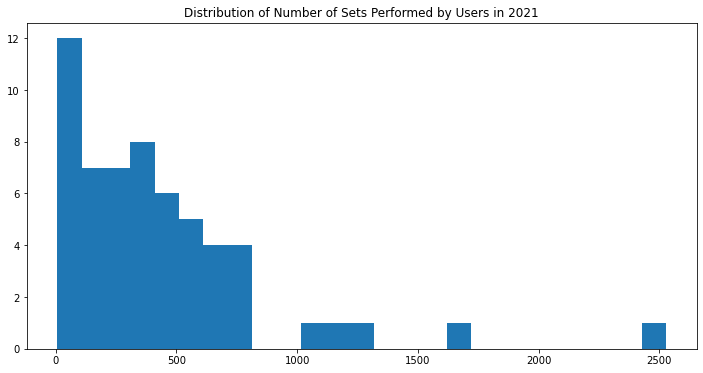

In [97]:
sets_dict = {}

for idx in range(len(df)):
    user = df['fake_user_id'][idx]
    sets = df['totalSets'][idx]
    if user not in sets_dict:
        sets_dict[user] = sets

counts = list(sets_dict.values())

plt.figure(figsize=(12,6))
plt.title('Distribution of Number of Sets Performed by Users in 2021')
plt.hist(counts, bins=25)
plt.show()

In [98]:
print('median number of sets: {}'.format(np.round(np.median(counts), 2)))
print('mean number of sets: {}'.format(np.round(np.mean(counts), 2)))

median number of sets: 365.5
mean number of sets: 437.09


A2: Most users performed well under 500 sets in total.

Q3: When did most users join/leave the app?

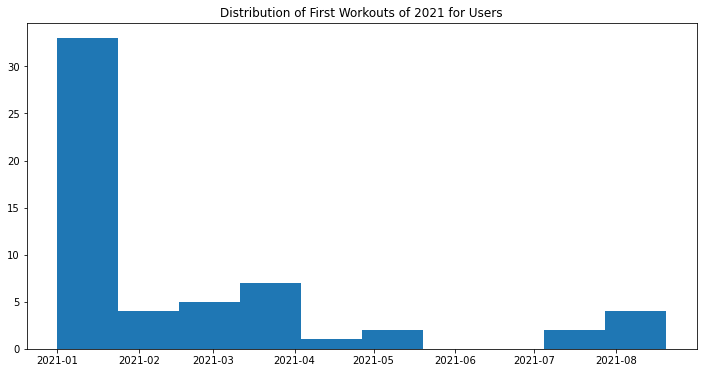

In [49]:
plt.figure(figsize=(12,6))
plt.title('Distribution of First Workouts of 2021 for Users')
plt.hist(join_dict.values())
plt.show()

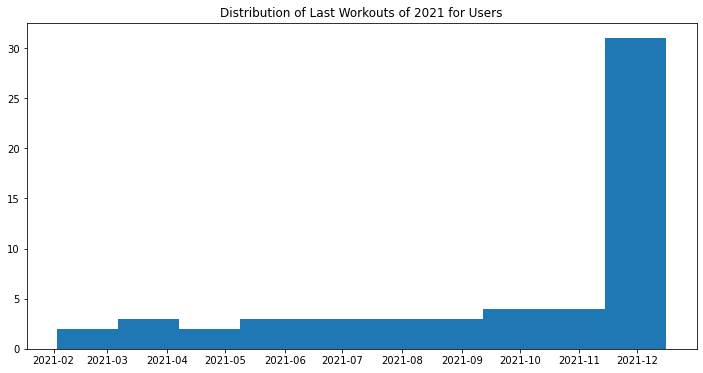

In [43]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Last Workouts of 2021 for Users')
plt.hist(end_dict.values())
plt.show()

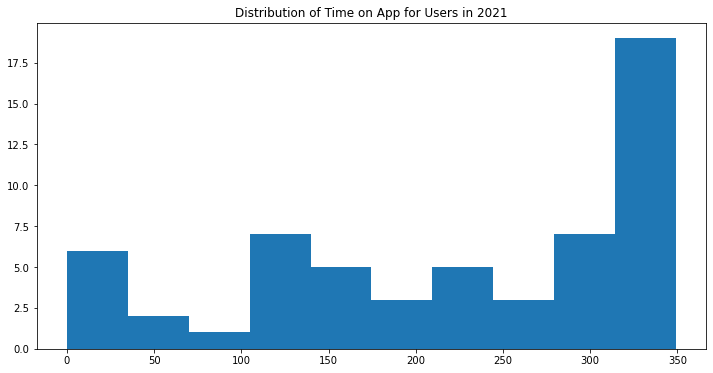

In [46]:
duration_dict = {}

for user in df['fake_user_id'].unique():
    temp_df = df[df['fake_user_id'] == user]
    duration_dict[user] = list(temp_df['daysOnApp'])[0]
    
plt.figure(figsize=(12,6))
plt.title('Distribution of Time on App for Users in 2021')
plt.hist(duration_dict.values())
plt.show()

A3: Most users were on the app for the duration of 2021.

#### Date

Q1: Are there certain dates and times where people are more likely to exercise?

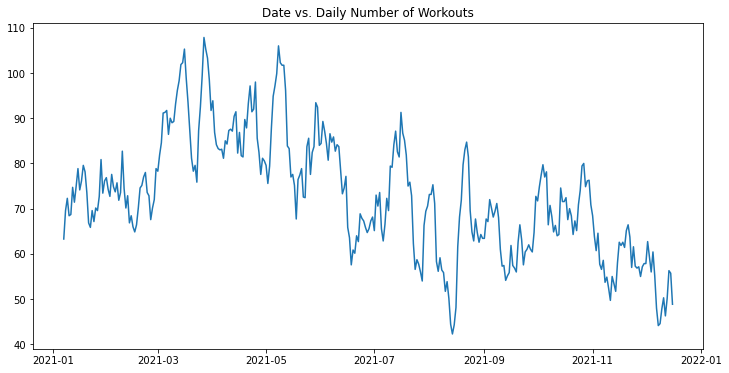

In [35]:
date_count_dict = dict(df.groupby('Date').agg('count')['workoutId'])
dates = list(date_count_dict.keys())
counts = list(date_count_dict.values())

# Average over past seven days to smooth curve
prev_seven_day_average = []
for idx in range(6, len(counts)):
    prev_seven_day_average.append(np.mean(counts[idx-6: idx+1]))

plt.figure(figsize=(12,6))
plt.title('Date vs. Daily Number of Workouts')
plt.plot(dates[6:], prev_seven_day_average)
plt.show()

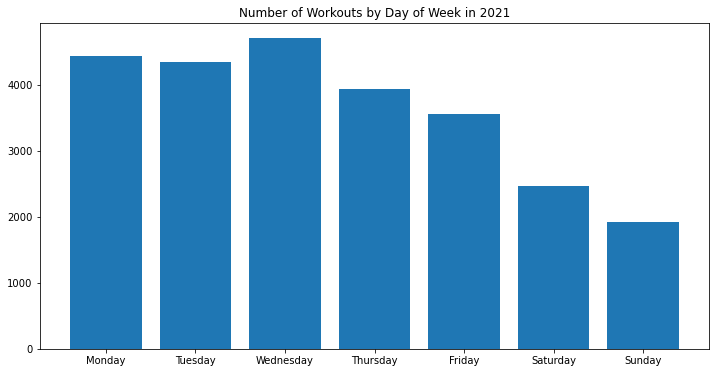

In [36]:
# From above we can see that there is slight negative trend to the date (i.e., as the year progresses, there are fewer
# workouts). It's hard to determine from the above picture whether there's much seasonality. To do that, let's look at
# the average number of workouts grouped by day of week.
day_conversion_dict = {0: 'Monday',
                       1: 'Tuesday',
                       2: 'Wednesday', 
                       3: 'Thursday',
                       4: 'Friday', 
                       5: 'Saturday',
                       6: 'Sunday'}

day_of_week_dict = dict(df.groupby('dayOfWeek').agg('count')['workoutId'])
days = list(day_of_week_dict.keys())
days = [day_conversion_dict[day] for day in days]
counts = list(day_of_week_dict.values())

plt.figure(figsize=(12,6))
plt.title('Number of Workouts by Day of Week in 2021')
plt.bar(days, counts)
plt.show()

A1: Generally more people worked out at the beginning of the year rather than the end of the year. Moreover, people tend to
exercise earlier in the week (before Thursday) rather than later.

Q2: What is the average time between workouts?

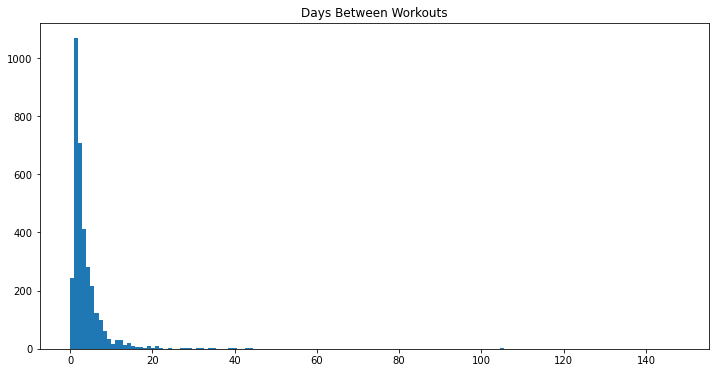

In [83]:
workout_days_since = {}

for idx in range(len(df)):
    workout = df['workoutId'][idx]
    days = df['daysSinceLastWorkout'][idx]
    if workout not in workout_days_since and days >= 0:
        workout_days_since[workout] = days

days = list(workout_days_since.values())

plt.figure(figsize=(12,6))
plt.title('Days Between Workouts')
plt.hist(days, bins=150)
plt.show()

In [80]:
print('median time between workouts: {} days'.format(np.round(np.median(days), 2)))
print('mean time between workouts: {} days'.format(np.round(np.mean(days), 2)))

median time between workouts: 2.0 days
mean time between workouts: 3.77 days


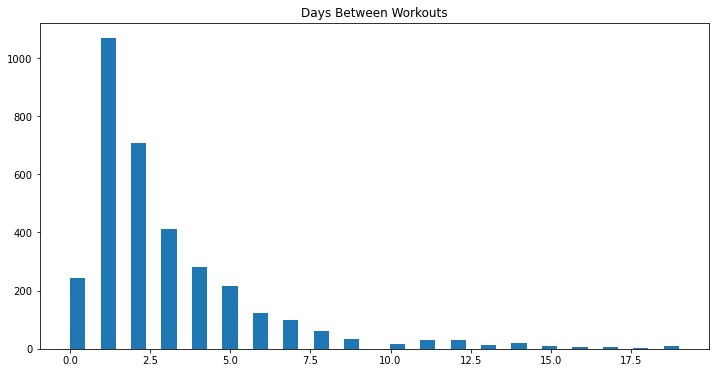

In [81]:
days = [day for day in days if day < 20]

plt.figure(figsize=(12,6))
plt.title('Days Between Workouts')
plt.hist(days, bins=40)
plt.show()

A2: Most workouts in this dataset occur within two days of the last workout completed by the given user

#### Exercise

Q1: What are the most popular exercises?

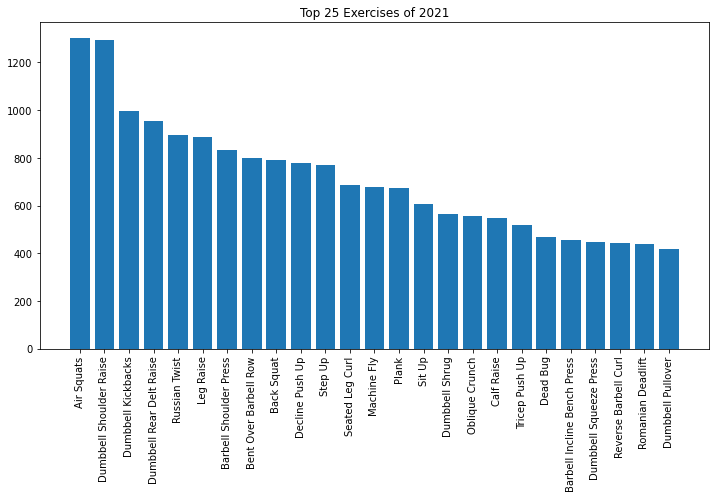

In [56]:
exercises_dict = dict(df.groupby('exerciseName').agg('count')['Date'])
exercises_dict = {exercise: count for exercise, count in sorted(exercises_dict.items(), key=lambda item: item[1])[::-1]}
exercises = list(exercises_dict.keys())[:25]
counts = list(exercises_dict.values())[:25]

plt.figure(figsize=(12,6))
plt.title('Top 25 Exercises of 2021')
plt.xticks(rotation=90)
plt.bar(exercises, counts)
plt.show()

A1: Air Squats, DB Shoulder Raise, DB Kickbacks, DB Rear Delt Raise, and Russian Twist are the five most popular exercises

Q2: Which exercises are most frequently done in the same workout?

In [41]:
exercise_workout_dict = {exercise: {} for exercise in df['exerciseName'].unique()}

for workout in df['workoutId'].unique():
    temp_df = df[df['workoutId'] == workout]
    for exercise1 in temp_df['exerciseName'].unique():
        for exercise2 in temp_df['exerciseName'].unique():
            if exercise2 not in exercise_workout_dict[exercise1]:
                exercise_workout_dict[exercise1][exercise2] = 1
            else:
                exercise_workout_dict[exercise1][exercise2] += 1
                
for exercise in df['exerciseName'].unique():
    del exercise_workout_dict[exercise][exercise]

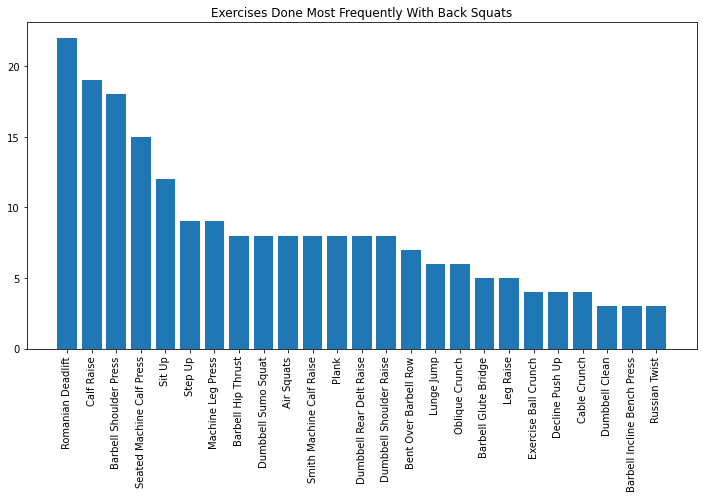

In [61]:
# Now we can see what exercises and done most frequently with another chosen exercise. For example, consider the below
back_squat_dict = {key: val for key, val in sorted(exercise_workout_dict['Back Squat'].items(), key=lambda item: item[1])[::-1]}
exercises = list(back_squat_dict.keys())[:25]
counts = list(back_squat_dict.values())[:25]

plt.figure(figsize=(12,6))
plt.title('Exercises Done Most Frequently With Back Squats')
plt.xticks(rotation=90)
plt.bar(exercises, counts)
plt.show()

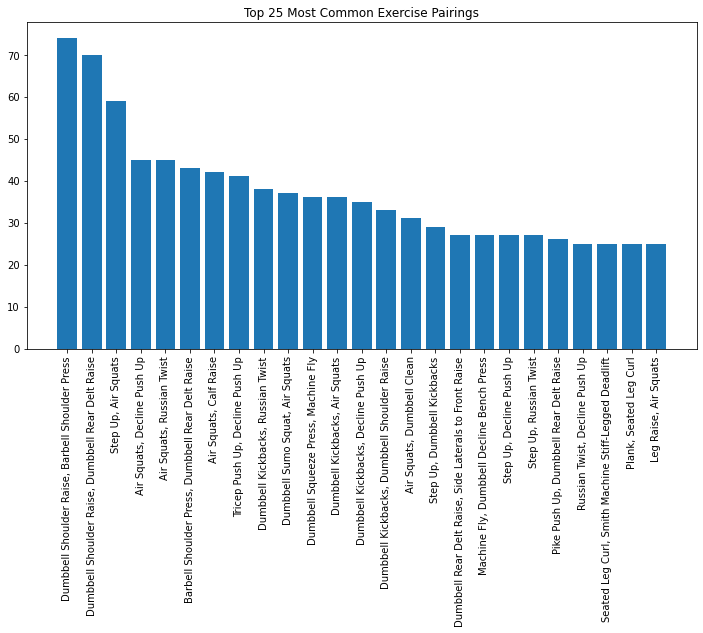

In [71]:
counts_dict = {}

for exercise1, exercise_dict in exercise_workout_dict.items():
    for exercise2 in exercise_dict.keys():
        if (exercise2, exercise1) not in counts_dict:
            counts_dict[(exercise1, exercise2)] = exercise_dict[exercise2]
            
counts_dict = {key: val for key, val in sorted(counts_dict.items(), key=lambda item: item[1])[::-1]}

exercise_pairings = list(counts_dict.keys())[:25]
exercise_pairings = [_[0] + ',' + ' ' + _[1] for _ in exercise_pairings]
counts = list(counts_dict.values())[:25]

plt.figure(figsize=(12,6))
plt.title('Top 25 Most Common Exercise Pairings')
plt.xticks(rotation=90)
plt.bar(exercise_pairings, counts)
plt.show()

A2: DB Shoulder Raise and Barbell Shoulder Press is the most common exercise combination in a single workout

#### Reps

Q1: What is a typical rep range?

In [50]:
rep_std = np.std(df['reps'])
rep_mean = np.mean(df['reps'])
lower_bound = max(1, rep_mean-1.96*rep_std)
upper_bound = rep_mean+1.96*rep_std
print('95% of sets involve the following rep range: {} - {}'.format(lower_bound, np.round(upper_bound, 2)))

95% of sets involve the following rep range: 1 - 21.18


A1: Generally people perform 1-20 reps of their chosen exercise.

Q2: What exercises generally involve the highest/lowest number of reps?

In [54]:
# Determine which exercises are best for strength and which are best for toning
exercise_rep_range_dict = {exercise: [] for exercise in df['exerciseName'].unique()}

for exercise in exercise_rep_range_dict.keys():
    temp_df = df[df['exerciseName'] == exercise]
    rep_std = np.std(temp_df['reps'])
    rep_mean = np.mean(temp_df['reps'])
    lower_bound = max(1, rep_mean-1.96*rep_std)
    upper_bound = max(1, rep_mean+1.96*rep_std)
    exercise_rep_range_dict[exercise].append(lower_bound)
    exercise_rep_range_dict[exercise].append(rep_mean)
    exercise_rep_range_dict[exercise].append(upper_bound)

In [62]:
# Strength/toning based on 95th percentile for reps
strength_exercises = []
toning_exercises = []

for key in exercise_rep_range_dict.keys():
    if exercise_rep_range_dict[key][2] <= 10 and exercise_rep_range_dict[key][2] > 1:
        strength_exercises.append(key)
    elif exercise_rep_range_dict[key][2] > 25:
        toning_exercises.append(key)

A2: See below

In [63]:
strength_exercises

['Single Leg Hip Thrust',
 'Standing Hip Flexor Stretch',
 'Handle Band Squat to Press',
 'Clean',
 'Hang Snatch',
 'TRX Glute Bridge',
 'TRX Pulse Lunges',
 'Clean Deadlift',
 'Clean and Jerk',
 'TRX Atomic Push Up',
 'TRX Pike',
 'TRX Fallout']

In [64]:
toning_exercises

['Frog Pump',
 'Air Squats',
 'Russian Twist',
 'Standing Hip Adduction',
 'Sit Up',
 'Exercise Ball Crunch',
 'Calf Raise',
 'Abs Bike']